# **Exploratory Data Analysis**

**Data Ingestion, Preliminary Data Analysis**

In [ ]:
# Installing some necessary libraries
%%capture

%pip install seaborn matplotlib pandas

In [25]:
# Importing necessary libraries

import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import pandas as pd 
import numpy as np 
import os

In [5]:
zip_path = r"C:\Users\Welcome Sir\Downloads\wine+quality.zip"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.printdir()
    

File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [8]:
with zipfile.ZipFile(zip_path) as z:
    with z.open('winequality-red.csv') as f:
        red_wine = pd.read_csv(f, sep=";")

In [9]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [16]:
# Let's pick out the numerical columns and get the descriptions
num_features = red_wine.select_dtypes(include=["float64", "int64"]).columns
red_wine[num_features].describe().transpose()
red_wine[num_features].describe().T     #This can be used as well

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [19]:
red_wine.quality.unique()

array([5, 6, 7, 4, 8, 3])

**Categorizing the quality to fit in range**<br>
| Numeric   | Category  | Meaning           |
| --------- | --------  | ----------------- |
| 3-4       | **Low**   | Poor quality wines|
| 5-6       | **Medium**| Average\typical wines|
| 7-8+      | **High**  | Premium-quality wines|

In [20]:
# Function to Categorize quality of wine
def map_quality_category(x):
    if x <= 4:
        return "Low"
    elif x <= 6:
        return "Medium"
    else:
        return "High"
    
# Let's apply the function
red_wine["quality_label"] = red_wine["quality"].apply(map_quality_category)

In [21]:
red_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Medium
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,Medium
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,High
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,High
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,Medium


In [23]:
# Let's make a copy of our data
df = red_wine.copy()

**Univariate Analysis**<br>
- This helps to decide which variables may need scaling, transformation or binning.
- This helps to know whether skewness could affect modelling assumptions (e.g; for regression).
- This helps to decide which variables are categorical or continuous.
- This helps to know how quality labels (target variable) are distributed.

To implement this, a function will be written for it below;

In [32]:
def univariate_numerical_eda(df, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    Args:
        df (_type_): _description_
        column (_type_): _description_
    """
    print(f"Feature: {column}")
    print("=" *40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")
    
    plt.figure(figsize=(12,4))
    
    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color="teal")
    plt.title(f"\n Distribution of {column}", fontsize=13)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color="teal")
    plt.title(f"\n Boxplot of {column}", fontsize=13)
    
    plt.tight_layout()
    plt.show()
    
    # Optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")

Feature: fixed acidity
       fixed acidity
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000

Skewness: 0.983
Kurtosis: 1.132


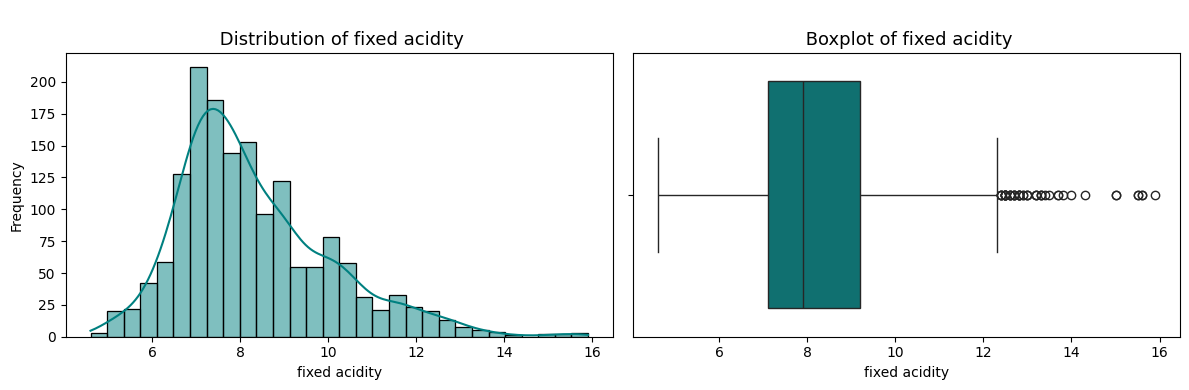

fixed acidity is moderately skewed.


In [33]:
# 1. Fixed Acidity
univariate_numerical_eda(df, "fixed acidity")

Feature: fixed acidity
       fixed acidity
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000

Skewness: 0.983
Kurtosis: 1.132


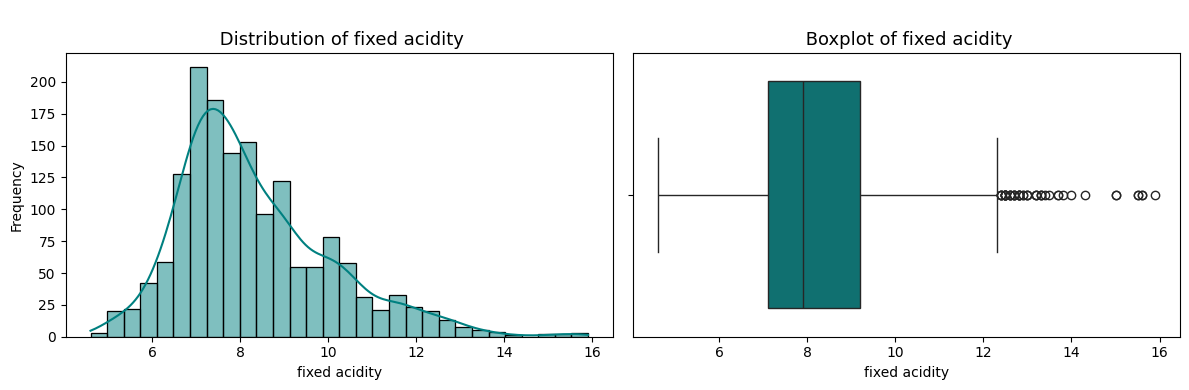

fixed acidity is moderately skewed.
Feature: volatile acidity
       volatile acidity
count       1599.000000
mean           0.527821
std            0.179060
min            0.120000
25%            0.390000
50%            0.520000
75%            0.640000
max            1.580000

Skewness: 0.672
Kurtosis: 1.226


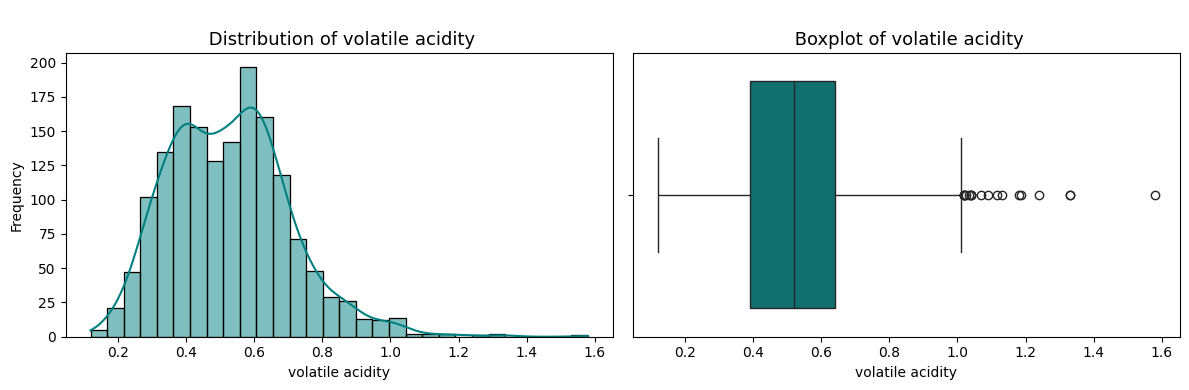

volatile acidity is moderately skewed.
Feature: citric acid
       citric acid
count  1599.000000
mean      0.270976
std       0.194801
min       0.000000
25%       0.090000
50%       0.260000
75%       0.420000
max       1.000000

Skewness: 0.318
Kurtosis: -0.789


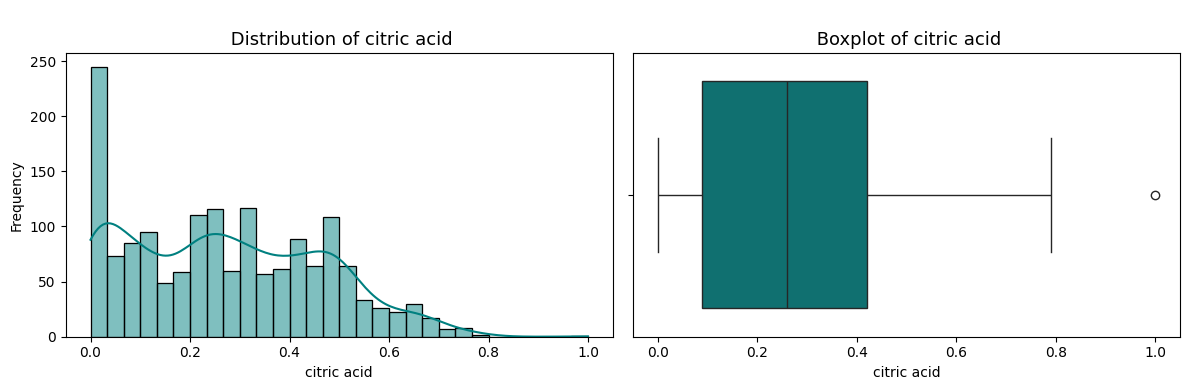

citric acid is fairly symmetric.
Feature: residual sugar
       residual sugar
count     1599.000000
mean         2.538806
std          1.409928
min          0.900000
25%          1.900000
50%          2.200000
75%          2.600000
max         15.500000

Skewness: 4.541
Kurtosis: 28.618


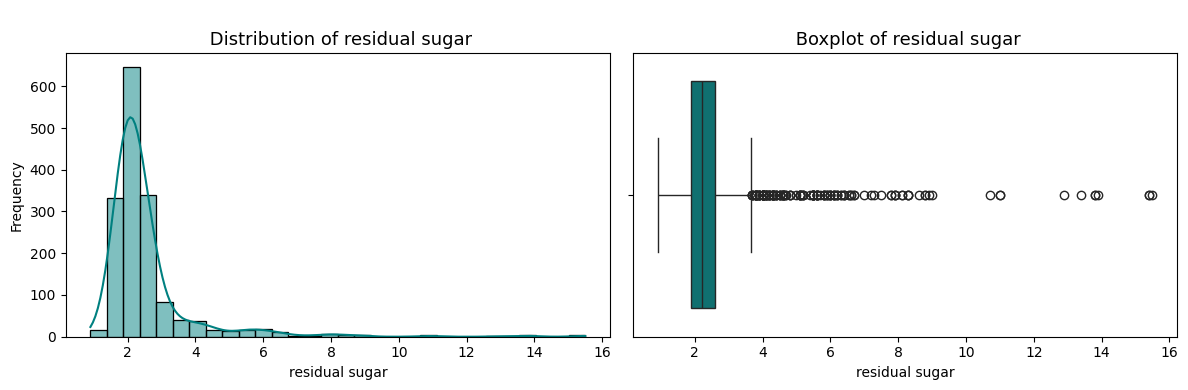


 residual sugar is highly skewed. Consider log or Box-Cox transformation.
Feature: chlorides
         chlorides
count  1599.000000
mean      0.087467
std       0.047065
min       0.012000
25%       0.070000
50%       0.079000
75%       0.090000
max       0.611000

Skewness: 5.680
Kurtosis: 41.716


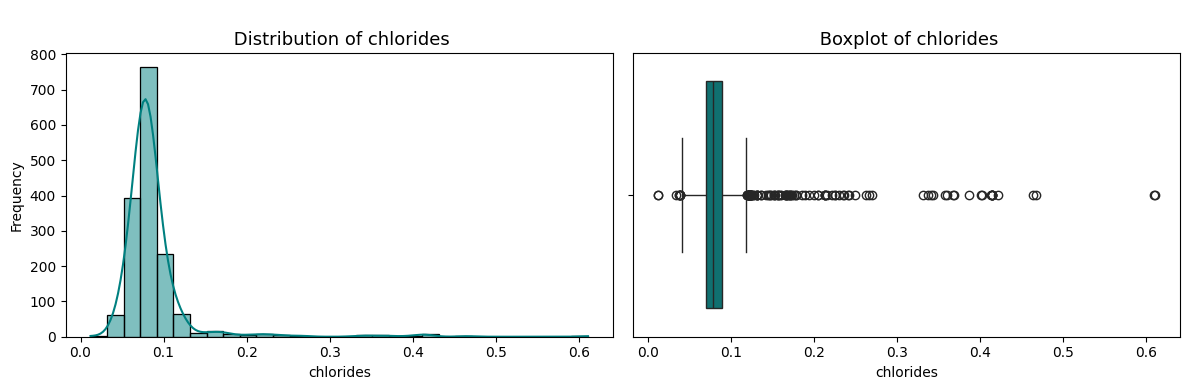


 chlorides is highly skewed. Consider log or Box-Cox transformation.
Feature: free sulfur dioxide
       free sulfur dioxide
count          1599.000000
mean             15.874922
std              10.460157
min               1.000000
25%               7.000000
50%              14.000000
75%              21.000000
max              72.000000

Skewness: 1.251
Kurtosis: 2.024


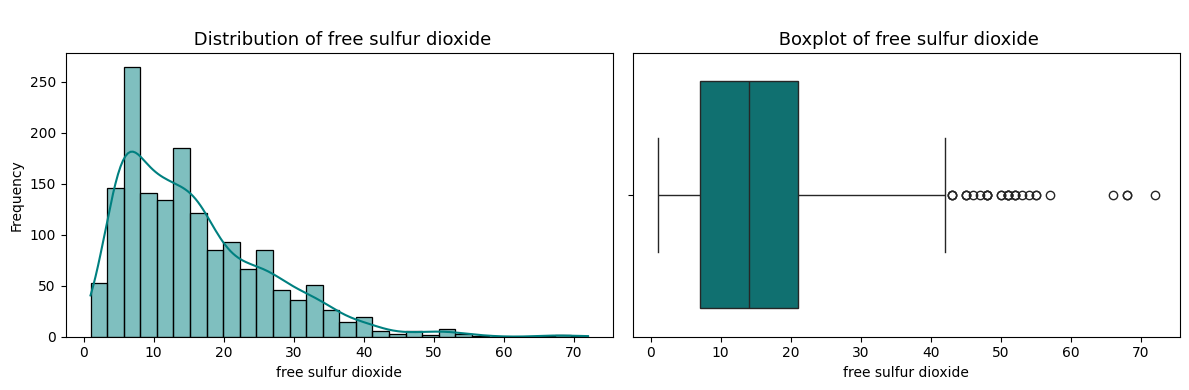


 free sulfur dioxide is highly skewed. Consider log or Box-Cox transformation.
Feature: total sulfur dioxide
       total sulfur dioxide
count           1599.000000
mean              46.467792
std               32.895324
min                6.000000
25%               22.000000
50%               38.000000
75%               62.000000
max              289.000000

Skewness: 1.516
Kurtosis: 3.810


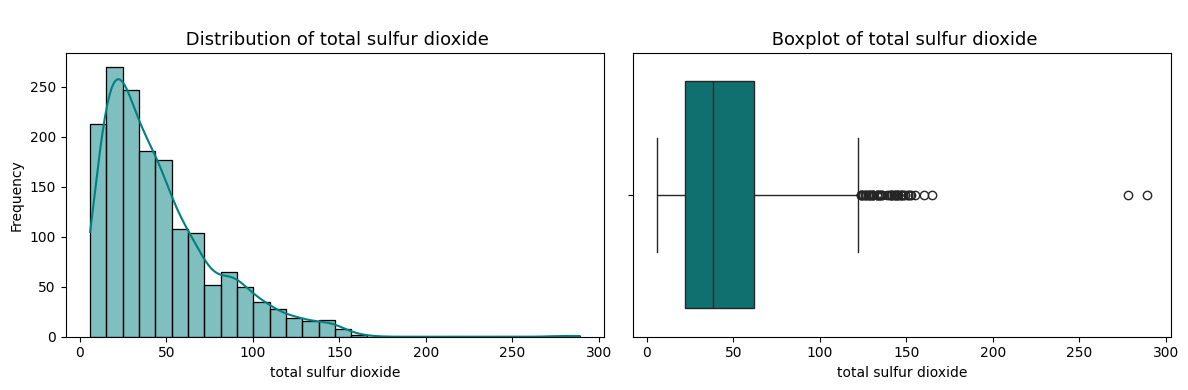


 total sulfur dioxide is highly skewed. Consider log or Box-Cox transformation.
Feature: density
           density
count  1599.000000
mean      0.996747
std       0.001887
min       0.990070
25%       0.995600
50%       0.996750
75%       0.997835
max       1.003690

Skewness: 0.071
Kurtosis: 0.934


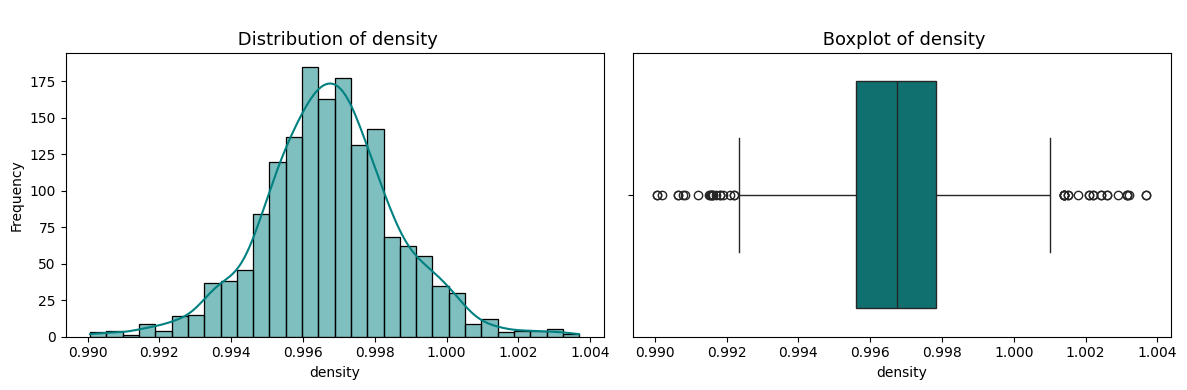

density is fairly symmetric.
Feature: pH
                pH
count  1599.000000
mean      3.311113
std       0.154386
min       2.740000
25%       3.210000
50%       3.310000
75%       3.400000
max       4.010000

Skewness: 0.194
Kurtosis: 0.807


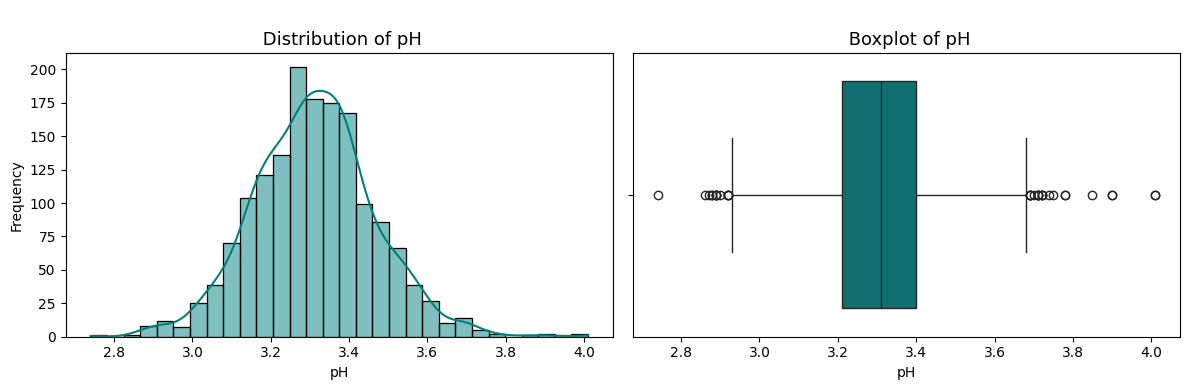

pH is fairly symmetric.
Feature: sulphates
         sulphates
count  1599.000000
mean      0.658149
std       0.169507
min       0.330000
25%       0.550000
50%       0.620000
75%       0.730000
max       2.000000

Skewness: 2.429
Kurtosis: 11.720


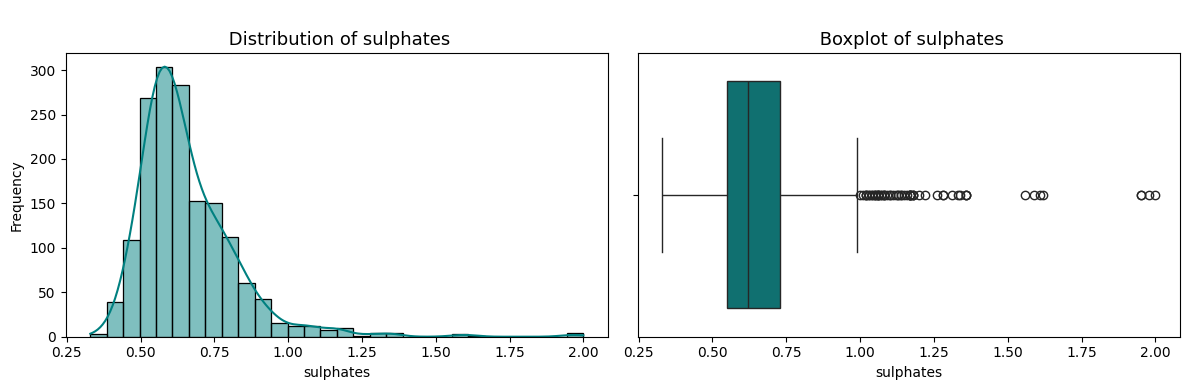


 sulphates is highly skewed. Consider log or Box-Cox transformation.
Feature: alcohol
           alcohol
count  1599.000000
mean     10.422983
std       1.065668
min       8.400000
25%       9.500000
50%      10.200000
75%      11.100000
max      14.900000

Skewness: 0.861
Kurtosis: 0.200


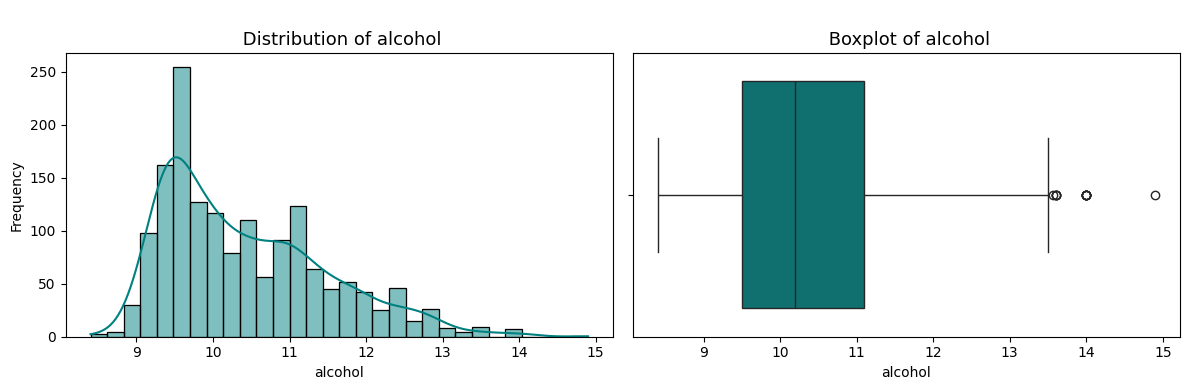

alcohol is moderately skewed.
Feature: quality
           quality
count  1599.000000
mean      5.636023
std       0.807569
min       3.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       8.000000

Skewness: 0.218
Kurtosis: 0.297


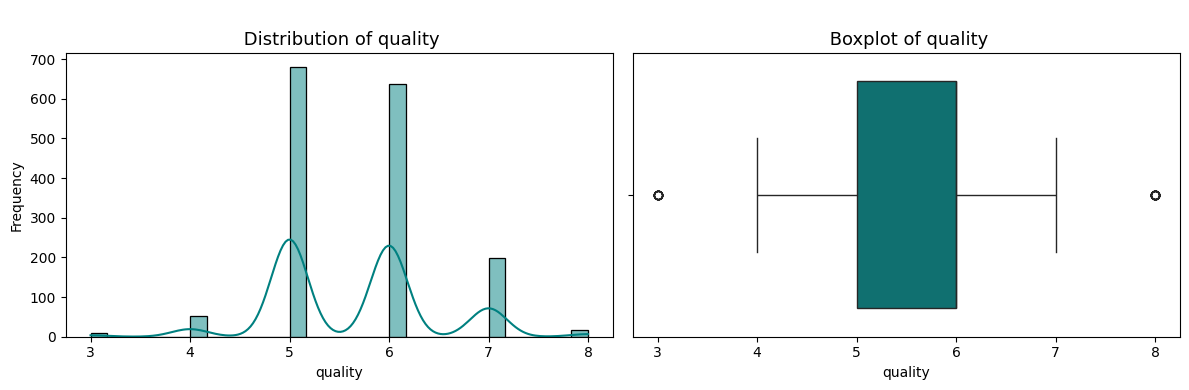

quality is fairly symmetric.


In [34]:
# We can loop to save time
for col in num_features:
    univariate_numerical_eda(df, col)

In [35]:
def univariate_categorical_eda(df, column):
    """ 
    Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, and a countplot.
    """
    print(f"Feature: {column}")
    print("="*40)
    
    # Frequency + Proportion
    freq = df[column].value_counts()
    prop = df[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({"Count": freq, "Percentage": prop.round(2)})
    print(summary)
    print()
    
    # Visualization
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=column, data=df, palette="Set2", order=freq.index, color="teal")
    plt.title(f"Distribution of {column}", fontsize=13)
    plt.xlabel(column)
    plt.ylabel("Count")
    
    # Annotate each bar with percentage
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1, 
                f"{(height/total)*100:.1f}%", ha="center")
    plt.tight_layout()
    plt.show()

In [36]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

In [37]:
red_wine["quality_label"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

Feature: quality_label
               Count  Percentage
quality_label                   
Medium          1319       82.49
High             217       13.57
Low               63        3.94



C:\Users\Welcome Sir\AppData\Local\Temp\ipykernel_14920\335240525.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette="Set2", order=freq.index, color="teal")


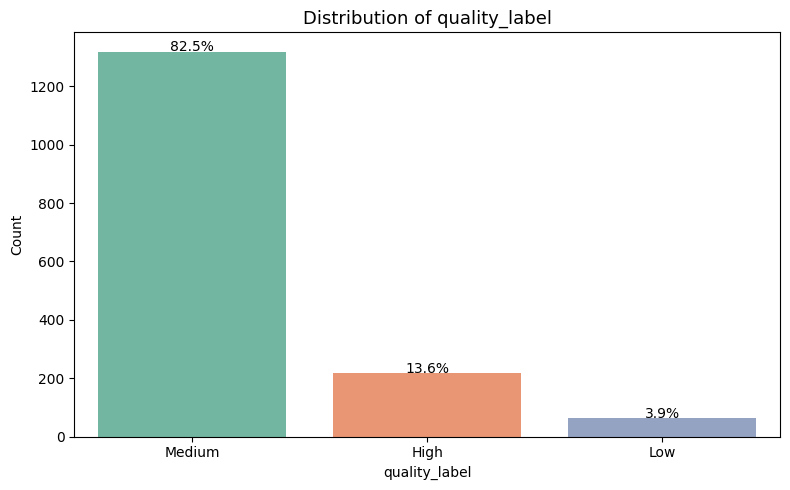

In [38]:
univariate_categorical_eda(red_wine, "quality_label")